In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# check if GPU is available and use it; otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [2]:

# Define the Neural Network model
class Network2(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_layer = nn.Linear(1, 10)
        self.output_layer = nn.Linear(10, 1)

    def forward(self, x):
        layer_out = torch.sigmoid(self.hidden_layer(x))
        output = self.output_layer(layer_out)
        return output
    
N2 = Network2()
N2 = N2.to(device)


In [3]:

# The function f(x) for the differential equation y'' + 2y' - 3y = 0
def f(x):
    return torch.zeros_like(x)

# Modify the loss function to include the first derivative term (dy/dx)
def loss(x):
    x.requires_grad = True
    y = N2(x)
    
    # First derivative dy/dx
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    
    # Second derivative d^2y/dx^2
    d2y_dx2 = torch.autograd.grad(dy_dx.sum(), x, create_graph=True)[0]
    
    # Equation: y'' + 2y' - 3y = 0
    ode_residual = d2y_dx2 + 2 * dy_dx - 3 * y
    
    # Loss includes ODE residual loss and boundary condition penalty terms
    return torch.mean(ode_residual**2) + 0.5*(y[0, 0] - 1.)**2 + 0.5*(y[-1, 0] - torch.exp(torch.tensor(1.0)))**2


In [4]:

# Optimizer
optimizer = torch.optim.LBFGS(N2.parameters())


In [5]:

# Input values
x = torch.linspace(0, 1, 100)[:, None]


In [6]:

# Closure function for LBFGS optimizer
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l


In [7]:

# Training loop
epochs = 10
for i in range(epochs):
    optimizer.step(closure)


In [8]:
xx = torch.linspace(0, 1, 100)[:, None]
with torch.no_grad():
    yy = N2(xx)


In [9]:

# Exact solution
exact_solution = torch.exp(xx)


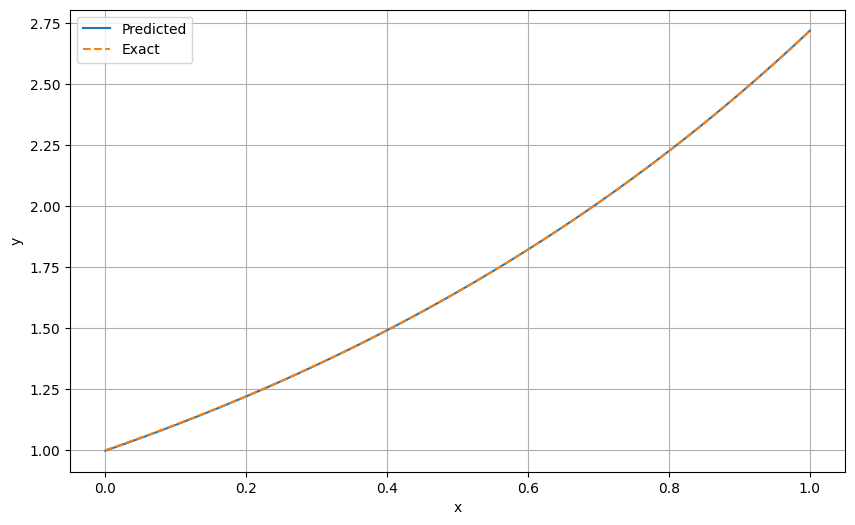

In [10]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(xx, yy, label="Predicted")
plt.plot(xx, exact_solution, '--', label="Exact")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
